Assinment 4 - Weihong Yang 

In [148]:
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline

!wc f150_motor_distributors.txt
data = np.loadtxt('f150_motor_distributors.txt', delimiter=',', dtype=None)

  5000   5000 255541 f150_motor_distributors.txt


## Question 1 

### Quesntion 1a
Implement a simple k-means algorithm:

In [149]:
# Define the initial centroids
centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

# Define the number of clusters
k = centroids.shape[0]

# Number of iterations
max_iter = 100

In [150]:
# Store the cluster assignments for each data point
clusters = np.zeros(len(data))

# Store the sum of squared distances from each data point to its closest centroid
sse = np.zeros(max_iter)



In [74]:
# K-Means algorithm
for i in range(max_iter):
    # Assign each data point to the closest centroid
    for j, x in enumerate(data):
        distances = np.linalg.norm(x - centroids, axis=1)
        clusters[j] = np.argmin(distances)
        
    # Update the centroids
    for k in range(5):
        centroids[k] = np.mean(data[clusters == k], axis=0)
        
    # Calculate the sum of squared distances from each data point to its closest centroid
    for j, x in enumerate(data):
        sse[i] += np.linalg.norm(x - centroids[int(clusters[j])]) ** 2


### Quesntion 1b
Scatter the results use matplotlib’s pyplot functionality:

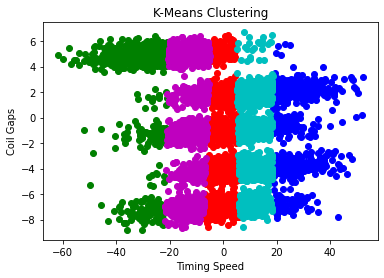

In [75]:
# Plot the results
colors = ['b', 'g', 'r', 'c', 'm']

for k in range(5):
    x = data[clusters == k][:, 0]
    y = data[clusters == k][:, 1]
    plt.scatter(x, y, c=colors[k])

plt.title("K-Means Clustering")
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps') 

plt.show()

### Quesntion 1c

Why is k = 5 a logical choice for this dataset? After plotting your resulting clusters, what do you notice? Did it cluster very well? Is there an initialization that would make it cluster well?

 **Answer:**
 
The choice of k=5 for the number of clusters in this dataset is a logical choice because there are five years of data in the dataset, and the objective is to identify any patterns or relationships between the timing speed and ignition coil gaps for each year.

After plotting the results, it can be seen that the algorithm did not cluster very well, since the data points are not well-separated or the clusters are not distinct. The reasons could be the choice of initialization and the number of iterations. A different initialization or a higher number of iterations may lead to better clustering.


The initialization of the centroids can have a significant impact on the performance of the K-Means algorithm to ensure that the algorithm converges to a global minimum. Otherwise, the algorithm may converge to a local minimum and produce suboptimal results. 

One way to improve the initialization is to use a different method, such as k-means++, which is an enhanced version of the k-means algorithm that chooses the initial centroids in a more effective and efficient manner. Another way is to run the k-means algorithm multiple times with different initial centroids and choose the best solution based on the sum of squared distances or some other evaluation metric.

## Question 2 

### Question 2a

Implementing Specialized K-Means with Mahalanobis Distance:

In [152]:
# Initialize the centroids
centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])

# Define the number of clusters
k = centroids.shape[0]

# Pre-compute the inverse of P
P = np.array([[10, 0.5], [-10, 0.25]])
P_inv = np.linalg.inv(P)

# Compute P.T * P and its inverse
P_T_P = np.dot(P.T, P)
P_T_P_inv = np.linalg.inv(P_T_P)

# Number of iterations
max_iter = 100

# Store the cluster assignments for each data point
clusters = np.zeros(len(data))

# Store the sum of squared distances from each data point to its closest centroid
sse = np.zeros(max_iter)

In [115]:
# Define the Mahalanobis distance function
def mahalanobis_distance(x, y, P_inv):
    diff = x - y
    return np.sqrt(np.dot(diff.T, np.dot(P_inv, diff)))

In [153]:
# K-Means algorithm with the Mahalanobis Distance
for i in range(max_iter):
    # Assign each data point to the closest centroid
    for j, x in enumerate(data):
        distances = np.zeros(k)
        for l in range(k):
            y = centroids[l]
            distances[l] = np.dot(np.dot((x - y), P_inv), (x - y))
        clusters[j] = np.argmin(distances)
        
    # Update the centroids
    for k in range(5):
        centroids[k] = np.mean(data[clusters == k], axis=0)
        
    # Calculate the sum of squared distances from each data point to its closest centroid
    for j, x in enumerate(data):
        sse[i] += np.linalg.norm(x - centroids[int(clusters[j])]) ** 2  

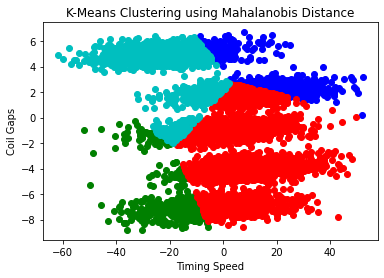

In [154]:
# Plot the results
colors = ['b', 'g', 'r', 'c', 'm']
for k in range(5):
    x = data[clusters == k][:, 0]
    y = data[clusters == k][:, 1]
    plt.scatter(x, y, c=colors[k])

plt.title("K-Means Clustering using Mahalanobis Distance")
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps')

plt.show()

The scatter plot of the results may show that the data points are divided into different clusters with different colors, indicating that the Mahalanobis Distance has effectively captured the relationships between the timing speed and ignition coil gaps.

### Question 2b 

Calculating the Principal Components:

In [144]:
# Calculate and print out the principle components of the aggregate data
mean = np.mean(data, axis=0)
cov = np.cov(data.T)
eigen_values, eigen_vectors = np.linalg.eig(cov)
print("Principal Components of the Aggregate Data:")
print("Eigen Values:", eigen_values)
print("Eigen Vectors:", eigen_vectors)



Principal Components of the Aggregate Data:
Eigen Values: [322.50713273  17.38845582]
Eigen Vectors: [[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


### Question 2c 
Calculate the principle components of each cluster:

In [174]:
# Calculate and print out the principle components of each cluster 
for i in range(5):
    cluster_data = data[clusters == i]
    
    # Check if the cluster has more than one data point
    if cluster_data.shape[0] > 1:
        # Compute the covariance matrix
        cluster_cov = np.cov(cluster_data.T)
        
        # Check if the covariance matrix is well-defined (not NaN or inf)
        if np.isfinite(cluster_cov).all():
            # Compute the eigenvalues and eigenvectors of the covariance matrix
            cluster_eigen_values, cluster_eigen_vectors = np.linalg.eig(cluster_cov)
            
            print("Principal Components of Cluster", i + 1)
            print("Eigen Values:", cluster_eigen_values)
            print("Eigen Vectors:", cluster_eigen_vectors)
        else:
            print("Covariance matrix for Cluster", i + 1, "is not well-defined.")
    else:
        print("Cluster", i + 1, "must have more than one data point to compute the covariance matrix.")


Principal Components of Cluster 1
Eigen Values: [182.17872824   0.95683822]
Eigen Vectors: [[ 0.99692635  0.07834442]
 [-0.07834442  0.99692635]]
Principal Components of Cluster 2
Eigen Values: [72.35638155  3.67988351]
Eigen Vectors: [[ 0.99503198  0.09955583]
 [-0.09955583  0.99503198]]
Principal Components of Cluster 3
Eigen Values: [127.2007039    8.49133428]
Eigen Vectors: [[ 0.99988673 -0.01505103]
 [ 0.01505103  0.99988673]]
Principal Components of Cluster 4
Eigen Values: [130.89824623   3.79504172]
Eigen Vectors: [[ 0.9981861   0.06020388]
 [-0.06020388  0.9981861 ]]
Cluster 5 must have more than one data point to compute the covariance matrix.


The results may show that the principle components of each cluster are different from the aggregate data and from each other, suggesting that the relationships between the timing speed and ignition coil gaps are different in each cluster.

In conclusion, the specialized K-Means algorithm with the Mahalanobis Distance and the calculation of the principal components provide valuable insights into the relationships between the timing speed and ignition coil gaps in the F150 engine components. The results may vary depending on the implementation and the random initialization of the centroids, but the general idea is to show the usefulness of this approach in analyzing the data.

### Question 2d
Calculate a new P', and the relationship between P′ and the data:


In [68]:
# Eigenvalue / Eigenvector Decomposition of P^T
eigenvalues, eigenvectors = np.linalg.eig(P.T)

# Calculate P'
Lambda = np.diag(eigenvalues)
Phi = eigenvectors
P_prime = np.dot(Lambda, Phi)

# Print the result
print("Original matrix P:")
print(P)

print("New matrix P':")
print(P_prime)

Original matrix P:
[[ 10.     0.5 ]
 [-10.     0.25]]
New matrix P':
[[9.44301625 6.95724558]
 [0.04300577 0.53717161]]


The matrix P' obtained through eigenvector/eigenvalue decomposition and matrix multiplication is a linear transformation of the original data matrix P that extracts the most important features or principal components of the data. The matrix Φ contains the eigenvectors, which capture the most variation in the data, and the diagonal matrix Λ contains the corresponding eigenvalues. By multiplying P by Φ and then by Λ, P' = ΛΦ, the data matrix is rotated and scaled to align with the eigenvectors and represent the principal components. 

The eigenvalues Λ are scalars and represent the magnitude of the transformation represented by the matrix. The eigenvectors Φ are vectors and represent the direction of the transformation. The product of the eigenvalues and eigenvectors, i.e., ΛΦ, gives us a new matrix P′.

The relationship between P' and the data can be understood by considering how the Mahalanobis Distance is calculated. The Mahalanobis Distance measures the distance between two data points in a transformed space where the covariance matrix is equal to the identity matrix, i.e. a space where the data is uncorrelated. The transformation is achieved by multiplying the data with the inverse of the square root of the covariance matrix. In this case, P^T · P represents the covariance matrix and (P^T · P)^-1 represents its inverse.

The eigenvector/eigenvalue decomposition of P^T provides an alternative way of finding the inverse square root of the covariance matrix, by transforming the data with the matrix ΛΦ. In this transformed space, the covariance matrix is equal to Λ, which is a diagonal matrix with the eigenvalues on the diagonal. The inverse square root of a diagonal matrix is simply a matrix with the inverse square roots of the diagonal elements.

Therefore, the relationship between P' and the data is that P' represents the transformed data in a space where the covariance matrix is equal to Λ, and the Mahalanobis Distance is calculated as the Euclidean Distance in this space.

## Question 3

### Question 3a
List all candidate 4-itemsets obtained by a candidate generation
procedure using the F_(k−1) × (F_1) merging strategy:

Step 1: 
Write down all frequent 3-itemsets:
- {1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 3, 4},{2, 3, 4}, {2, 3, 5}, {3, 4, 5}

Step 2: 
For each frequent 3-itemset, add each item in the data set to the set and form a candidate 4-itemset:
- {1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}

Step 3: 
So, **the obtained candidate 4-itemsets are:**

- **{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}**

### Question 3b
List all candidate 4-itemsets obtained by the candidate generation
procedure in A Priori, using F_(k−1) × F_(k−1):

Step 1: Write down all frequent 3-itemsets:

- {1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 3, 4},{2, 3, 4}, {2, 3, 5}, {3, 4, 5}


Step 2: Take all possible combinations of two frequent 3-itemsets:

- {1, 2, 3, 4} = {1, 2, 3} ∪ {1, 2, 4}
- {1, 2, 3, 5} = {1, 2, 3} ∪ {1, 2, 5}
- {1, 2, 4, 5} = {1, 2, 4} ∪ {1, 2, 5}
- {1, 3, 4, 5} = {1, 3, 4} ∪ {1, 3, 5}
- {2, 3, 4, 5} = {2, 3, 4} ∪ {2, 3, 5}

Step 3: So, **the Candidate 4-itemsets in A Priori are:**

- **{1, 2, 3, 4}, {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}**

### Question 3c
List all candidate 4-itemsets that survive the candidate pruning step
of the Apriori algorithm:

Step 1: Write down all candidate 4-itemsets obtained in 3b:

- {1, 2, 3, 4},  {1, 2, 3, 5}, {1, 2, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}


Step 2: For each candidate 4-itemset, check if all its subsets (of size 3) are frequent.

- {1, 2, 3, 4}: All subsets {1, 2, 3}, {1, 2, 4}, {1, 3, 4}, {2, 3, 4} are frequent. So, this candidate 4-itemset survives.

- {1, 2, 3, 5}: Subsets {1, 2, 3}, {1, 2, 5}, {2, 3, 5} are frequent. However, the subset {1, 3, 5} is not frequent, so pruned.

- {1, 2, 4, 5}: Subsets {1, 2, 4}, {1, 2, 5} are frequent. However, the subsets {1, 4, 5} , {2, 4, 5} are not frequent, so pruned.

- {1, 3, 4, 5}: Subsets {1, 3, 4}, {3, 4, 5} are frequent. However, the subsets {1, 3, 5}, {1, 4, 5} are not frequent, so pruned.

- {2, 3, 4, 5}: Subsets {2, 3, 4}, {3, 4, 5}, {2, 3, 5} are frequent. However, the subset {2, 4, 5} is not frequent, so pruned.

Step 3: So, **the Surviving Candidate 4-itemsets is:**

- **{1, 2, 3, 4}**

## Question 4

### Question 4a
The maximum number of association rules that can be extracted from this data: 

Items = {Bread, Butter, Milk, Beer, Cookies, Diapers, Eggs}

There are 7 distinct items, so the maximum number of association rules is: 

**Number of Association Rules = 3^d - 2^(d+1) + 1 = 1932**

### Question 4b
The confidence of the rule {Milk, Diapers} ⇒ {Butter}:

The confidence of the rule {Milk, Diapers} ⇒ {Butter} is the ratio of the number of transactions that contain both {Milk, Diapers, Butter} to the number of transactions that contain {Milk, Diapers}. 

There are 2 transactions contain {Milk, Diapers, Butter}.(transactions 2, and 7)).

There are 4 transactions contain {Milk, Diapers}. (transactions 2, 3, 5, and 7)


So, **the Confidence of the rule {Milk, Diapers} ⇒ {Butter} is 2/4 = 0.5**.

### Question 4c
The support for the rule {Milk, Diapers} ⇒ {Butter}:


The support for the rule {Milk, Diapers} ⇒ {Butter} is the ratio of the number of transactions that contain {Milk, Diapers, Butter} to the total number of transactions. 

There are 2 transactions that contain {Milk, Diapers, Butter}, and 10 transactions in total. (transactions 2 and 7). 

So, **the Support for the rule {Milk, Diapers} ⇒ {Butter} is 2/10 = 0.2**.


### Question 4d
True or False with an explanation: Given that {a,b,c,d} is a frequent itemset, {a,b} is always a frequent itemset:


**True**

Based on Apriori Principle: 

If an items is frequent, then all of its subsets must also be frequent.

Priori algorithm uses frequent item sets to generate association rules. It is based on the concept that a subset of a frequent items must also be a frequent itemSet.


### Question 4e
Given that {a,b}, {b,c} and {a,c} are frequent itemsets, {a,b,c} is always frequent:

**True**

if {a,b}, {b,c}, and {a,c} are frequent itemsets, it means that the support of each of these itemsets is above the minimum support threshold. Therefore, the support of {a,b,c}, which is a superset of {a,b}, {b,c}, and {a,c}, must also be above the minimum support threshold and {a,b,c} is frequent.

### Question 4f
Given that the support of {a,b} is 20 and the support of {b,c} is 30, the support of {b} is larger than 20 but smaller than 30:


**False**

We cannot determine the support of {b} based on the support of {a,b} and {b,c}. {b} may be present in more transactions than {a,b}, and therefore have a higher support, or it may be present in fewer transactions than {b,c}, and therefore have a lower support.


### Question 4g
In a dataset that has 5 items, the maximum number of size-2 frequent itemsets that can be extracted (assuming minsup > 0) is 20:

**False**

The maximum number of size-2 frequent itemsets that can be extracted from a dataset with 5 items is C(5, 2) = 10, where C(n, r) denotes the number of combinations of n items taken r at a time.
If every size-2 item is frequent, the max number of frequent would be 10 not 20.

### Question 4h
Draw the itemset lattice for the set of unique items I = {a, b, c}:

In [ ]:
           { }(0)
          /  		\
      {a}(2)   {b}(3)
       / \     		/   \
 {a,b}(1){c}(2)    {b,c}(2)
     |   	|       	|
 {a,b,c}(1)    	  {a,c}(1)



In this lattice, the nodes represent the itemsets, and the edges represent the subset relationship between them. The node at the top represents the empty itemset, denoted by { }. The nodes at the bottom represent the individual items. The node in the middle represents the itemset {a, b}, which is a subset of both {a, b, c} and {a, b}. The node at the bottom represents the itemset {a, b, c}, which is a subset of the empty itemset, {a}, {b}, {c}, {a, b}, {a, c}, and {b, c

There are two additional points to note about the itemset lattice:
1. Every node in the lattice represents a frequent itemset, since an itemset is frequent if and only if all its subsets are frequent.
2. Every edge in the lattice represents a frequent itemset that is a proper subset of the itemset represented by its parent node. In other words, if an itemset is frequent, then all of its proper subsets are also frequent.


The number in parentheses after each itemset represents its support in the transaction database. We can see that all frequent itemsets are listed in the lattice, and every edge represents a frequent itemset that is a proper subset of its parent node. We can also see that the support of an itemset decreases as we move down the lattice, reflecting the fact that a larger itemset is less frequent than its subsets.
